In [2]:
pip install pandas 


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 9.3 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/12.6 MB 9.2 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.6 MB 7.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.6 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.6 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 7.7 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.6 MB 7.6 MB/s eta 0:00:01
   -------------------------------------- - 12.1/12.6 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd 

df= pd.read_csv("titanic.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [23]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
a=df.select_dtypes(['float64']).columns
b=df.select_dtypes(['object']).columns
print(a)
print(b)

Index(['Fare'], dtype='object')
Index(['Name', 'Sex', 'Age', 'Ticket', 'Embarked'], dtype='object')


In [32]:
mean_values = df[a].mean()
mode_values = df[b].mode().iloc[0]

df[a] = df[a].fillna(mean_values)
df[b] = df[b].fillna(mode_values)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\324862723.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[b] = df[b].fillna(mode_values)


In [34]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            418
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [38]:
df["Age"] = df["Age"].fillna(df["Age"].mean())



In [42]:
print(df.isnull().sum())

df = df.assign(Age=df["Age"].fillna(df["Age"].mean()))


print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            418
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            418
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [46]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [47]:
df.duplicated().sum()

np.int64(0)

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

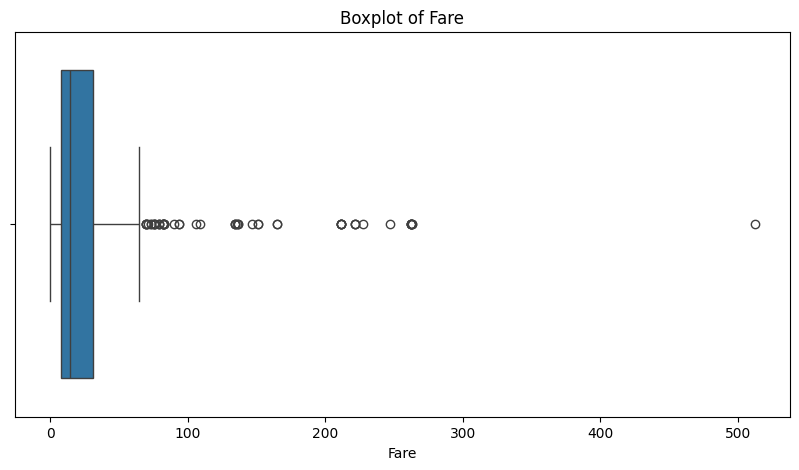

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot of Fare")
plt.show()

In [52]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

print(f"New dataset size after outlier removal: {df.shape}")

New dataset size after outlier removal: (363, 10)


In [53]:
# Create an Age Group feature
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child", "Teen", "Adult", "Middle-Aged", "Senior"])

# Create a Family Size feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # Including the passenger

# Convert categorical variables to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

print(df.head())


   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

   Age  SibSp  Parch   Ticket     Fare  Embarked AgeGroup  FamilySize  
0  NaN      0      0   330911   7.8292         1      NaN           1  
1  NaN      1      0   363272   7.0000         2      NaN           2  
2  NaN      0      0   240276   9.6875         1      NaN           1  
3  NaN      0      0   315154   8.6625         2      NaN           1  
4  NaN      1      1  3101298  12.2875         2      NaN           3  


In [55]:
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Fare with median
df["Fare"].fillna(df["Fare"].median(), inplace=True)

c:\Users\ADMIN\Desktop\Internship\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\3817496760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\3817496760.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an

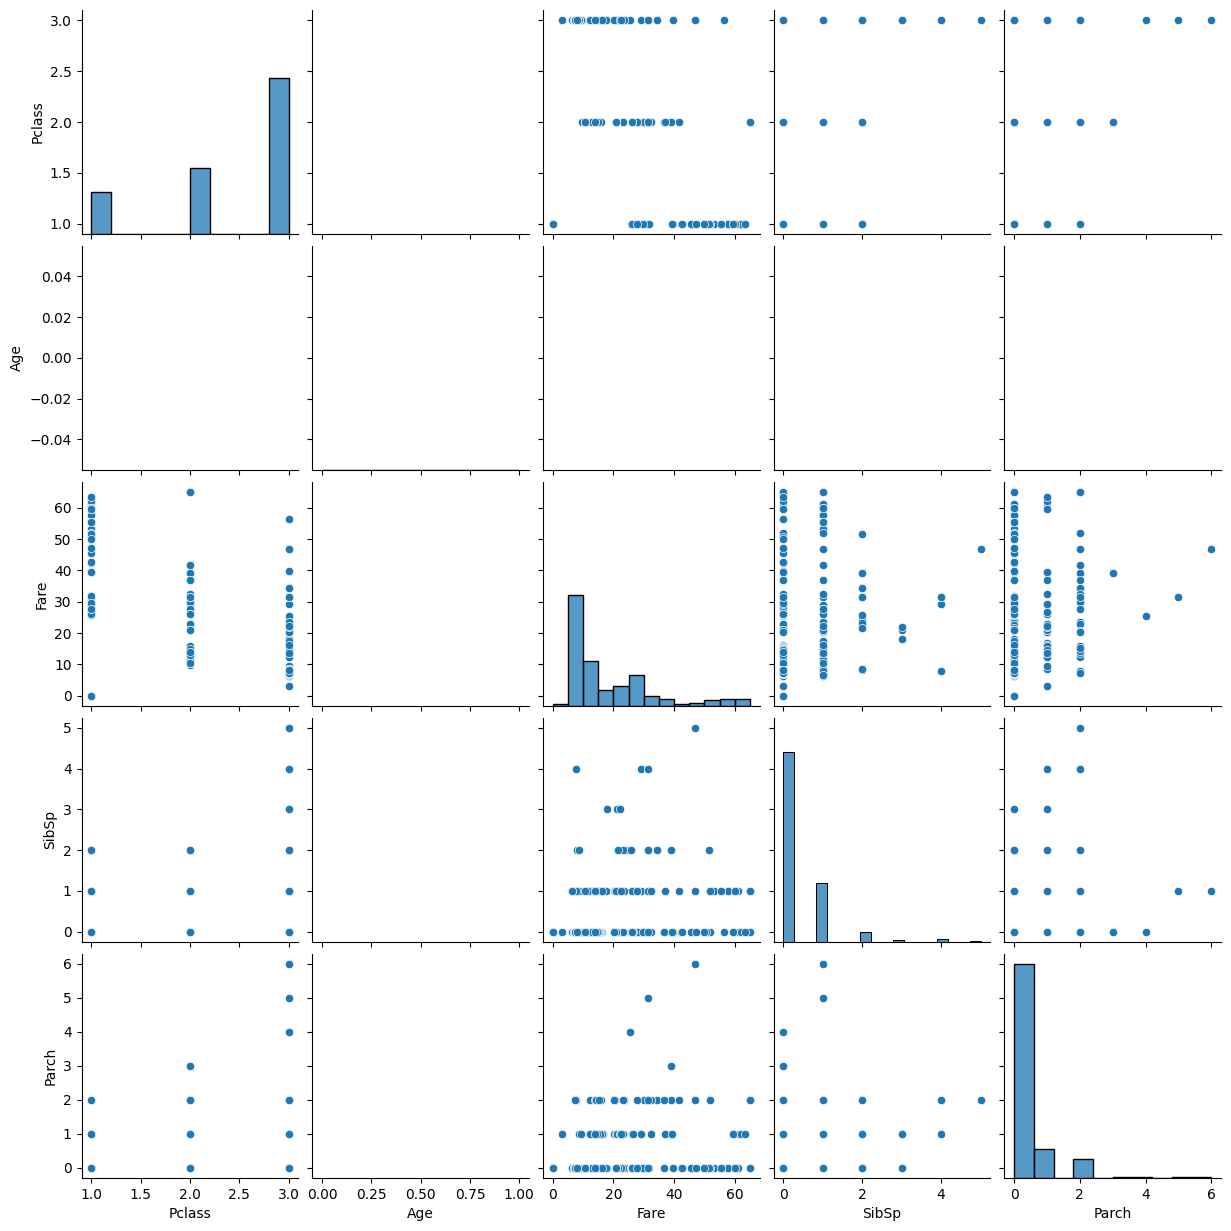

In [56]:
sns.pairplot(df[["Pclass", "Age", "Fare", "SibSp", "Parch"]])
plt.show()


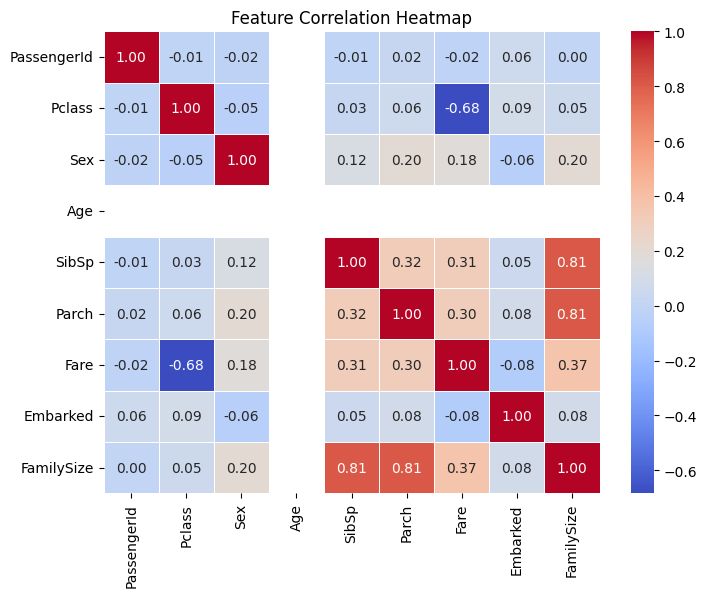

In [58]:
plt.figure(figsize=(8, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\1372499468.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Fare", data=df, ci=None, palette="viridis")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\1372499468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Fare", data=df, ci=None, palette="viridis")


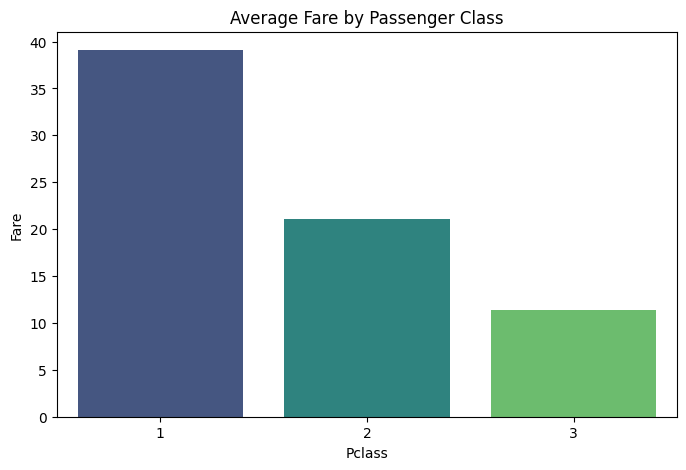

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Fare", data=df, ci=None, palette="viridis")
plt.title("Average Fare by Passenger Class")
plt.show()


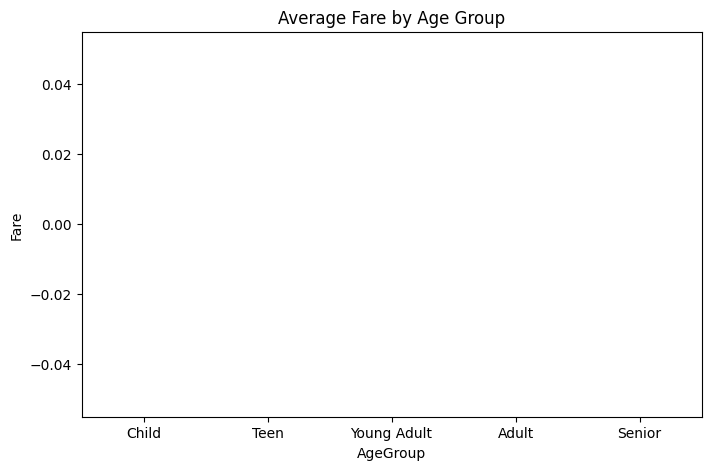

In [62]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100], 
                        labels=["Child", "Teen", "Young Adult", "Adult", "Senior"])

plt.figure(figsize=(8, 5))
sns.barplot(x="AgeGroup", y="Fare", data=df)
plt.title("Average Fare by Age Group")
plt.show()


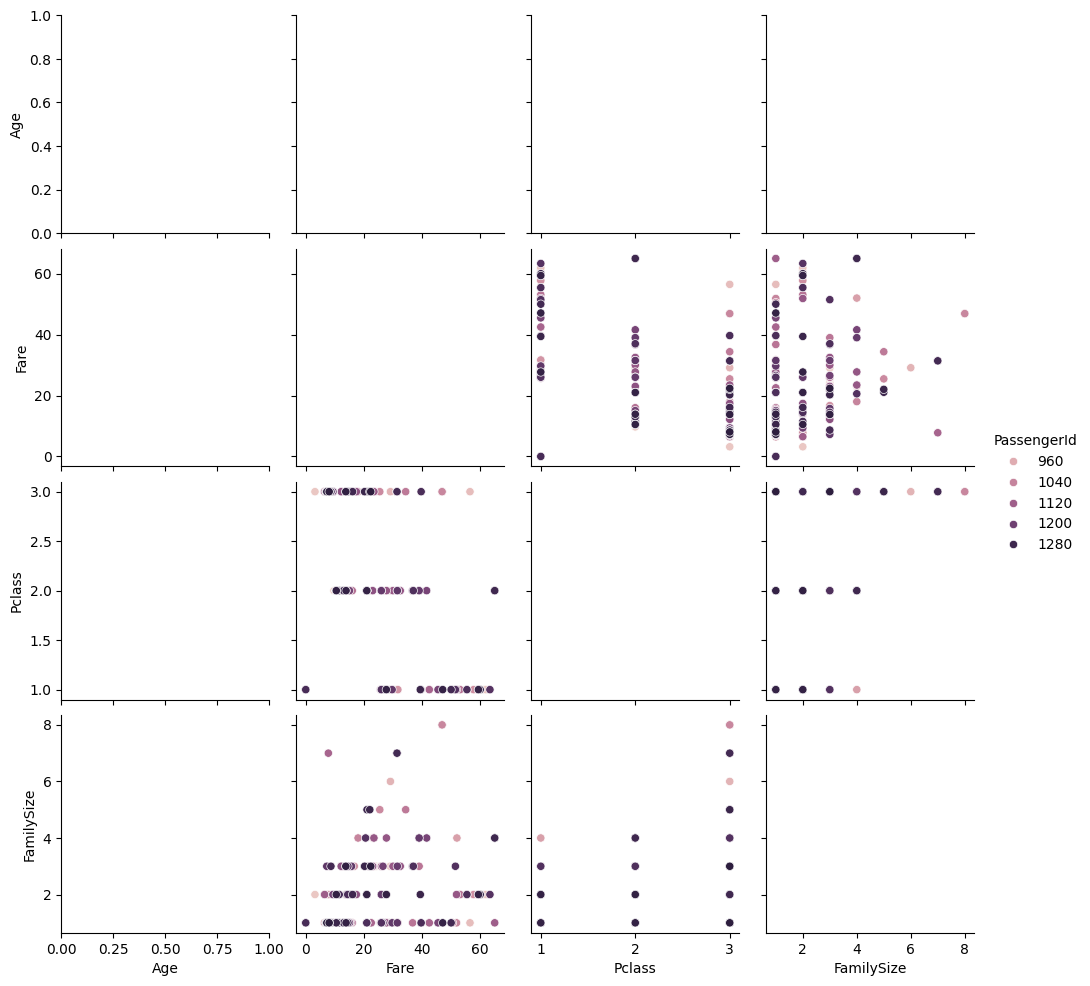

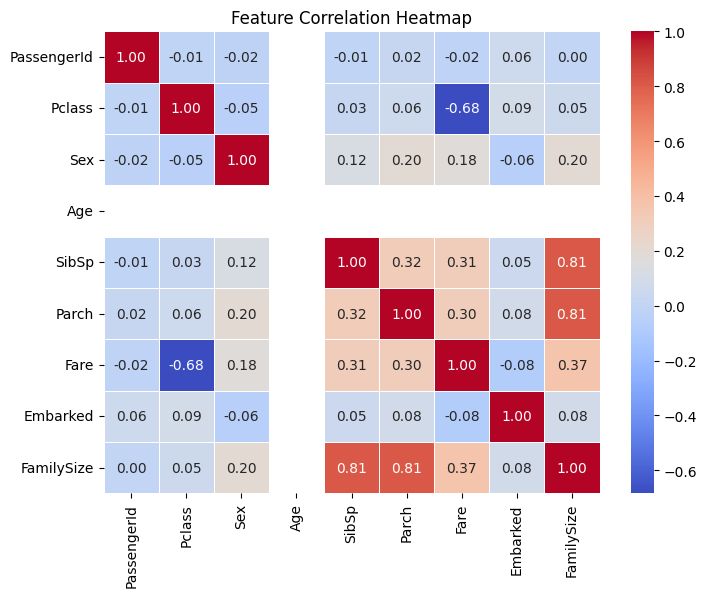

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2847411858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="PassengerId", data=df, errorbar=None, palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14036\2847411858.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(x="AgeGroup", y="PassengerId", data=df, errorbar=None, palette="coolwarm")


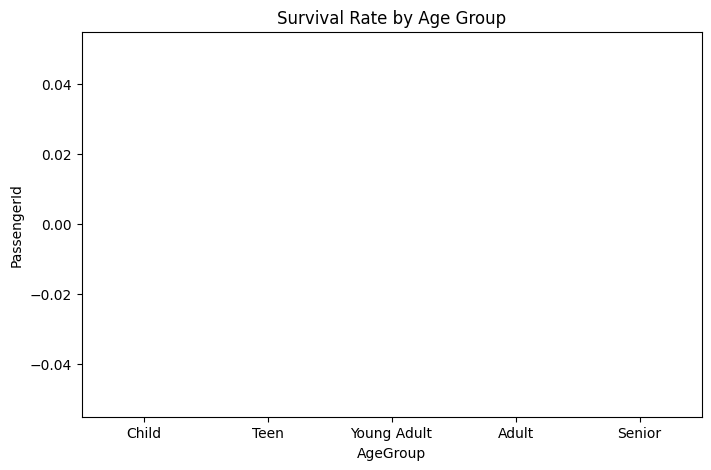

In [65]:
# Pairplot for numerical features
sns.pairplot(df[["PassengerId", "Age", "Fare", "Pclass", "FamilySize"]], hue="PassengerId")
plt.show()

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap with only numeric data
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Survival by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x="AgeGroup", y="PassengerId", data=df, errorbar=None, palette="coolwarm")
plt.title("Survival Rate by Age Group")
plt.show()





In [67]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Find highly correlated features (absolute correlation > 0.5)
high_corr_features = correlation_matrix[abs(correlation_matrix) > 0.5]
print(high_corr_features)


             PassengerId    Pclass  Sex  Age     SibSp    Parch      Fare  \
PassengerId          1.0       NaN  NaN  NaN       NaN      NaN       NaN   
Pclass               NaN  1.000000  NaN  NaN       NaN      NaN -0.684241   
Sex                  NaN       NaN  1.0  NaN       NaN      NaN       NaN   
Age                  NaN       NaN  NaN  NaN       NaN      NaN       NaN   
SibSp                NaN       NaN  NaN  NaN  1.000000      NaN       NaN   
Parch                NaN       NaN  NaN  NaN       NaN  1.00000       NaN   
Fare                 NaN -0.684241  NaN  NaN       NaN      NaN  1.000000   
Embarked             NaN       NaN  NaN  NaN       NaN      NaN       NaN   
FamilySize           NaN       NaN  NaN  NaN  0.811881  0.81121       NaN   

             Embarked  FamilySize  
PassengerId       NaN         NaN  
Pclass            NaN         NaN  
Sex               NaN         NaN  
Age               NaN         NaN  
SibSp             NaN    0.811881  
Parch        